In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-default-dataset/Loan_Default.csv


In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
import kagglehub

# Download latest version
df = kagglehub.dataset_download("yasserh/loan-default-dataset")

print("Path to dataset files:", df)

Path to dataset files: /kaggle/input/loan-default-dataset


In [4]:
df = pd.read_csv("/kaggle/input/loan-default-dataset/Loan_Default.csv")
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [7]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [8]:
df = df.drop_duplicates()

In [9]:
df.isnull().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [10]:
df.loan_limit.fillna(df.loan_limit.mode()[0],inplace=True)
df.dtir1.fillna(df.dtir1.mode()[0],inplace=True)
df.LTV.fillna(df.LTV.mode()[0],inplace=True)
df.submission_of_application.fillna(df.submission_of_application.mode()[0],inplace=True)
df.age.fillna(df.age.mode()[0],inplace=True)
df.income.fillna(df.income.mode()[0],inplace=True)
df.property_value.fillna(df.property_value.mode()[0],inplace=True)
df.Neg_ammortization.fillna(df.Neg_ammortization.mode()[0],inplace=True)
df.term.fillna(df.term.mode()[0],inplace=True)
df.approv_in_adv.fillna(df.approv_in_adv.mode()[0],inplace=True)
df.loan_purpose.fillna(df.loan_purpose.mode()[0],inplace=True)
df.rate_of_interest.fillna(df.rate_of_interest.mode()[0],inplace=True)
df.Interest_rate_spread.fillna(df.Interest_rate_spread.mode()[0],inplace=True)
df.Upfront_charges.fillna(df.Upfront_charges.mode()[0],inplace=True)

In [11]:
df.isnull().sum()

,0
ID,0
year,0
loan_limit,0
Gender,0
approv_in_adv,0
loan_type,0
loan_purpose,0
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [12]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound,df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound,df[column])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              148670 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148670 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

In [14]:
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [15]:
df.Gender.unique()

array(['Sex Not Available', 'Male', 'Joint', 'Female'], dtype=object)

In [16]:
df.Gender.value_counts()

,count
Gender,
Male,42346
Joint,41399
Sex Not Available,37659
Female,27266


In [17]:
df['Gender'] = df['Gender'].replace('Male', 1, regex=True)
df['Gender'] = df['Gender'].replace('Female', 2, regex=True)
df['Gender'] = df['Gender'].replace('Sex Not Available', 3, regex=True)
df['Gender'] = df['Gender'].replace('Joint', 4, regex=True)

In [22]:
df.loan_limit.unique()

array(['cf', 'ncf'], dtype=object)

In [18]:
df['loan_limit'] = [ 1 if i=='cf' else 0 for i in df['loan_limit']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [19]:
df.approv_in_adv.unique()

array(['nopre', 'pre'], dtype=object)

In [20]:
df['approv_in_adv'] = [ 1 if i=='pre' else 0 for i in df['approv_in_adv']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [21]:
df.loan_type.unique()

array(['type1', 'type2', 'type3'], dtype=object)

In [22]:
df['loan_type'] = df['loan_type'].replace('type1', 1, regex=True)
df['loan_type'] = df['loan_type'].replace('type2', 2, regex=True)
df['loan_type'] = df['loan_type'].replace('type3', 3, regex=True)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [23]:
df.loan_purpose.unique()

array(['p1', 'p4', 'p3', 'p2'], dtype=object)

In [24]:
df['loan_purpose'] = df['loan_purpose'].replace('p1', 1, regex=True)
df['loan_purpose'] = df['loan_purpose'].replace('p2', 2, regex=True)
df['loan_purpose'] = df['loan_purpose'].replace('p3', 3, regex=True)
df['loan_purpose'] = df['loan_purpose'].replace('p4', 4, regex=True)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [25]:
df.Credit_Worthiness.unique()

array(['l1', 'l2'], dtype=object)

In [26]:
df['Credit_Worthiness'] = [ 1 if i=='l1' else 0 for i in df['Credit_Worthiness']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [27]:
df.open_credit.unique()

array(['nopc', 'opc'], dtype=object)

In [28]:
df['open_credit'] = [ 1 if i=='opc' else 0 for i in df['open_credit']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,0,b/c,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,0,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,0,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,0,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [29]:
df.business_or_commercial.unique()

array(['nob/c', 'b/c'], dtype=object)

In [30]:
df['business_or_commercial'] = [ 1 if i=='b/c' else 0 for i in df['business_or_commercial']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,0,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,0,1,...,EQUI,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,0,0,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,0,0,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,0,0,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [31]:
df.credit_type.unique()

array(['EXP', 'EQUI', 'CRIF', 'CIB'], dtype=object)

In [32]:
df['credit_type'] = df['credit_type'].replace('EXP', 1, regex=True)
df['credit_type'] = df['credit_type'].replace('EQUI', 2, regex=True)
df['credit_type'] = df['credit_type'].replace('CRIF', 3, regex=True)
df['credit_type'] = df['credit_type'].replace('CIB', 4, regex=True)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,0,...,1,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,0,1,...,2,552,EXP,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,0,0,...,1,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,0,0,...,1,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,0,0,...,3,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [33]:
df["co-applicant_credit_type"].unique()

array(['CIB', 'EXP'], dtype=object)

In [34]:
df['co-applicant_credit_type'] = [ 1 if i=='CIB' else 0 for i in df['co-applicant_credit_type']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,0,...,1,758,1,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,0,1,...,2,552,0,55-64,to_inst,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,0,0,...,1,834,1,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,0,0,...,1,587,1,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,0,0,...,3,602,0,25-34,not_inst,91.886544,North,direct,0,39.0


In [35]:
df.submission_of_application.unique()

array(['to_inst', 'not_inst'], dtype=object)

In [36]:
df['submission_of_application'] = [ 1 if i=='to_inst' else 0 for i in df['submission_of_application']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,0,...,1,758,1,25-34,1,98.728814,south,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,0,1,...,2,552,0,55-64,1,81.250000,North,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,0,0,...,1,834,1,35-44,1,80.019685,south,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,0,0,...,1,587,1,45-54,0,69.376900,North,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,0,0,...,3,602,0,25-34,0,91.886544,North,direct,0,39.0


In [37]:
df.Region.unique()

array(['south', 'North', 'central', 'North-East'], dtype=object)

In [38]:
df['Region'] = df['Region'].replace('south', 1, regex=True)
df['Region'] = df['Region'].replace('North', 2, regex=True)
df['Region'] = df['Region'].replace('central', 3, regex=True)
df['Region'] = df['Region'].replace('North-East', 4, regex=True)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,0,...,1,758,1,25-34,1,98.728814,1,direct,1,45.0
1,24891,2019,1,1,0,2,1,1,0,1,...,2,552,0,55-64,1,81.250000,2,direct,1,37.0
2,24892,2019,1,1,1,1,1,1,0,0,...,1,834,1,35-44,1,80.019685,1,direct,0,46.0
3,24893,2019,1,1,0,1,4,1,0,0,...,1,587,1,45-54,0,69.376900,2,direct,0,42.0
4,24894,2019,1,4,1,1,1,1,0,0,...,3,602,0,25-34,0,91.886544,2,direct,0,39.0


In [39]:
df.Security_Type.unique()

array(['direct', 'Indriect'], dtype=object)

In [40]:
df['Security_Type'] = [ 1 if i=='direct' else 0 for i in df['Security_Type']]
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1,3,0,1,1,1,0,0,...,1,758,1,25-34,1,98.728814,1,1,1,45.0
1,24891,2019,1,1,0,2,1,1,0,1,...,2,552,0,55-64,1,81.250000,2,1,1,37.0
2,24892,2019,1,1,1,1,1,1,0,0,...,1,834,1,35-44,1,80.019685,1,1,0,46.0
3,24893,2019,1,1,0,1,4,1,0,0,...,1,587,1,45-54,0,69.376900,2,1,0,42.0
4,24894,2019,1,4,1,1,1,1,0,0,...,3,602,0,25-34,0,91.886544,2,1,0,39.0


In [41]:
df.age.unique

<bound method Series.unique of 0         25-34
1         55-64
2         35-44
3         45-54
4         25-34
          ...  
148665    55-64
148666    25-34
148667    45-54
148668    55-64
148669    45-54
Name: age, Length: 148670, dtype: object>

In [42]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['age']= label_encoder.fit_transform(df['age'])
df['age'].unique()

array([0, 3, 1, 2, 4, 6, 5])

In [43]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['construction_type']= label_encoder.fit_transform(df['construction_type'])
df['construction_type'].unique()

array([1, 0])

In [44]:
df.occupancy_type.unique()

array(['pr', 'sr', 'ir'], dtype=object)

In [45]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['occupancy_type']= label_encoder.fit_transform(df['occupancy_type'])
df['occupancy_type'].unique()

array([1, 2, 0])

In [46]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['interest_only']= label_encoder.fit_transform(df['interest_only'])
df['interest_only'].unique()

array([1, 0])

In [47]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Neg_ammortization']= label_encoder.fit_transform(df['Neg_ammortization'])
df['Neg_ammortization'].unique()

array([1, 0])

In [48]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['lump_sum_payment']= label_encoder.fit_transform(df['lump_sum_payment'])
df['lump_sum_payment'].unique()

array([1, 0])

In [49]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Secured_by']= label_encoder.fit_transform(df['Secured_by'])
df['Secured_by'].unique()

array([0, 1])

In [50]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['total_units']= label_encoder.fit_transform(df['total_units'])
df['total_units'].unique()

array([0, 1, 2, 3])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  int64  
 3   Gender                     148670 non-null  int64  
 4   approv_in_adv              148670 non-null  int64  
 5   loan_type                  148670 non-null  int64  
 6   loan_purpose               148670 non-null  int64  
 7   Credit_Worthiness          148670 non-null  int64  
 8   open_credit                148670 non-null  int64  
 9   business_or_commercial     148670 non-null  int64  
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  int64  
 3   Gender                     148670 non-null  int64  
 4   approv_in_adv              148670 non-null  int64  
 5   loan_type                  148670 non-null  int64  
 6   loan_purpose               148670 non-null  int64  
 7   Credit_Worthiness          148670 non-null  int64  
 8   open_credit                148670 non-null  int64  
 9   business_or_commercial     148670 non-null  int64  
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

In [53]:
df = df.drop(columns=["ID"])

In [54]:
df = df.drop(columns=["year"])

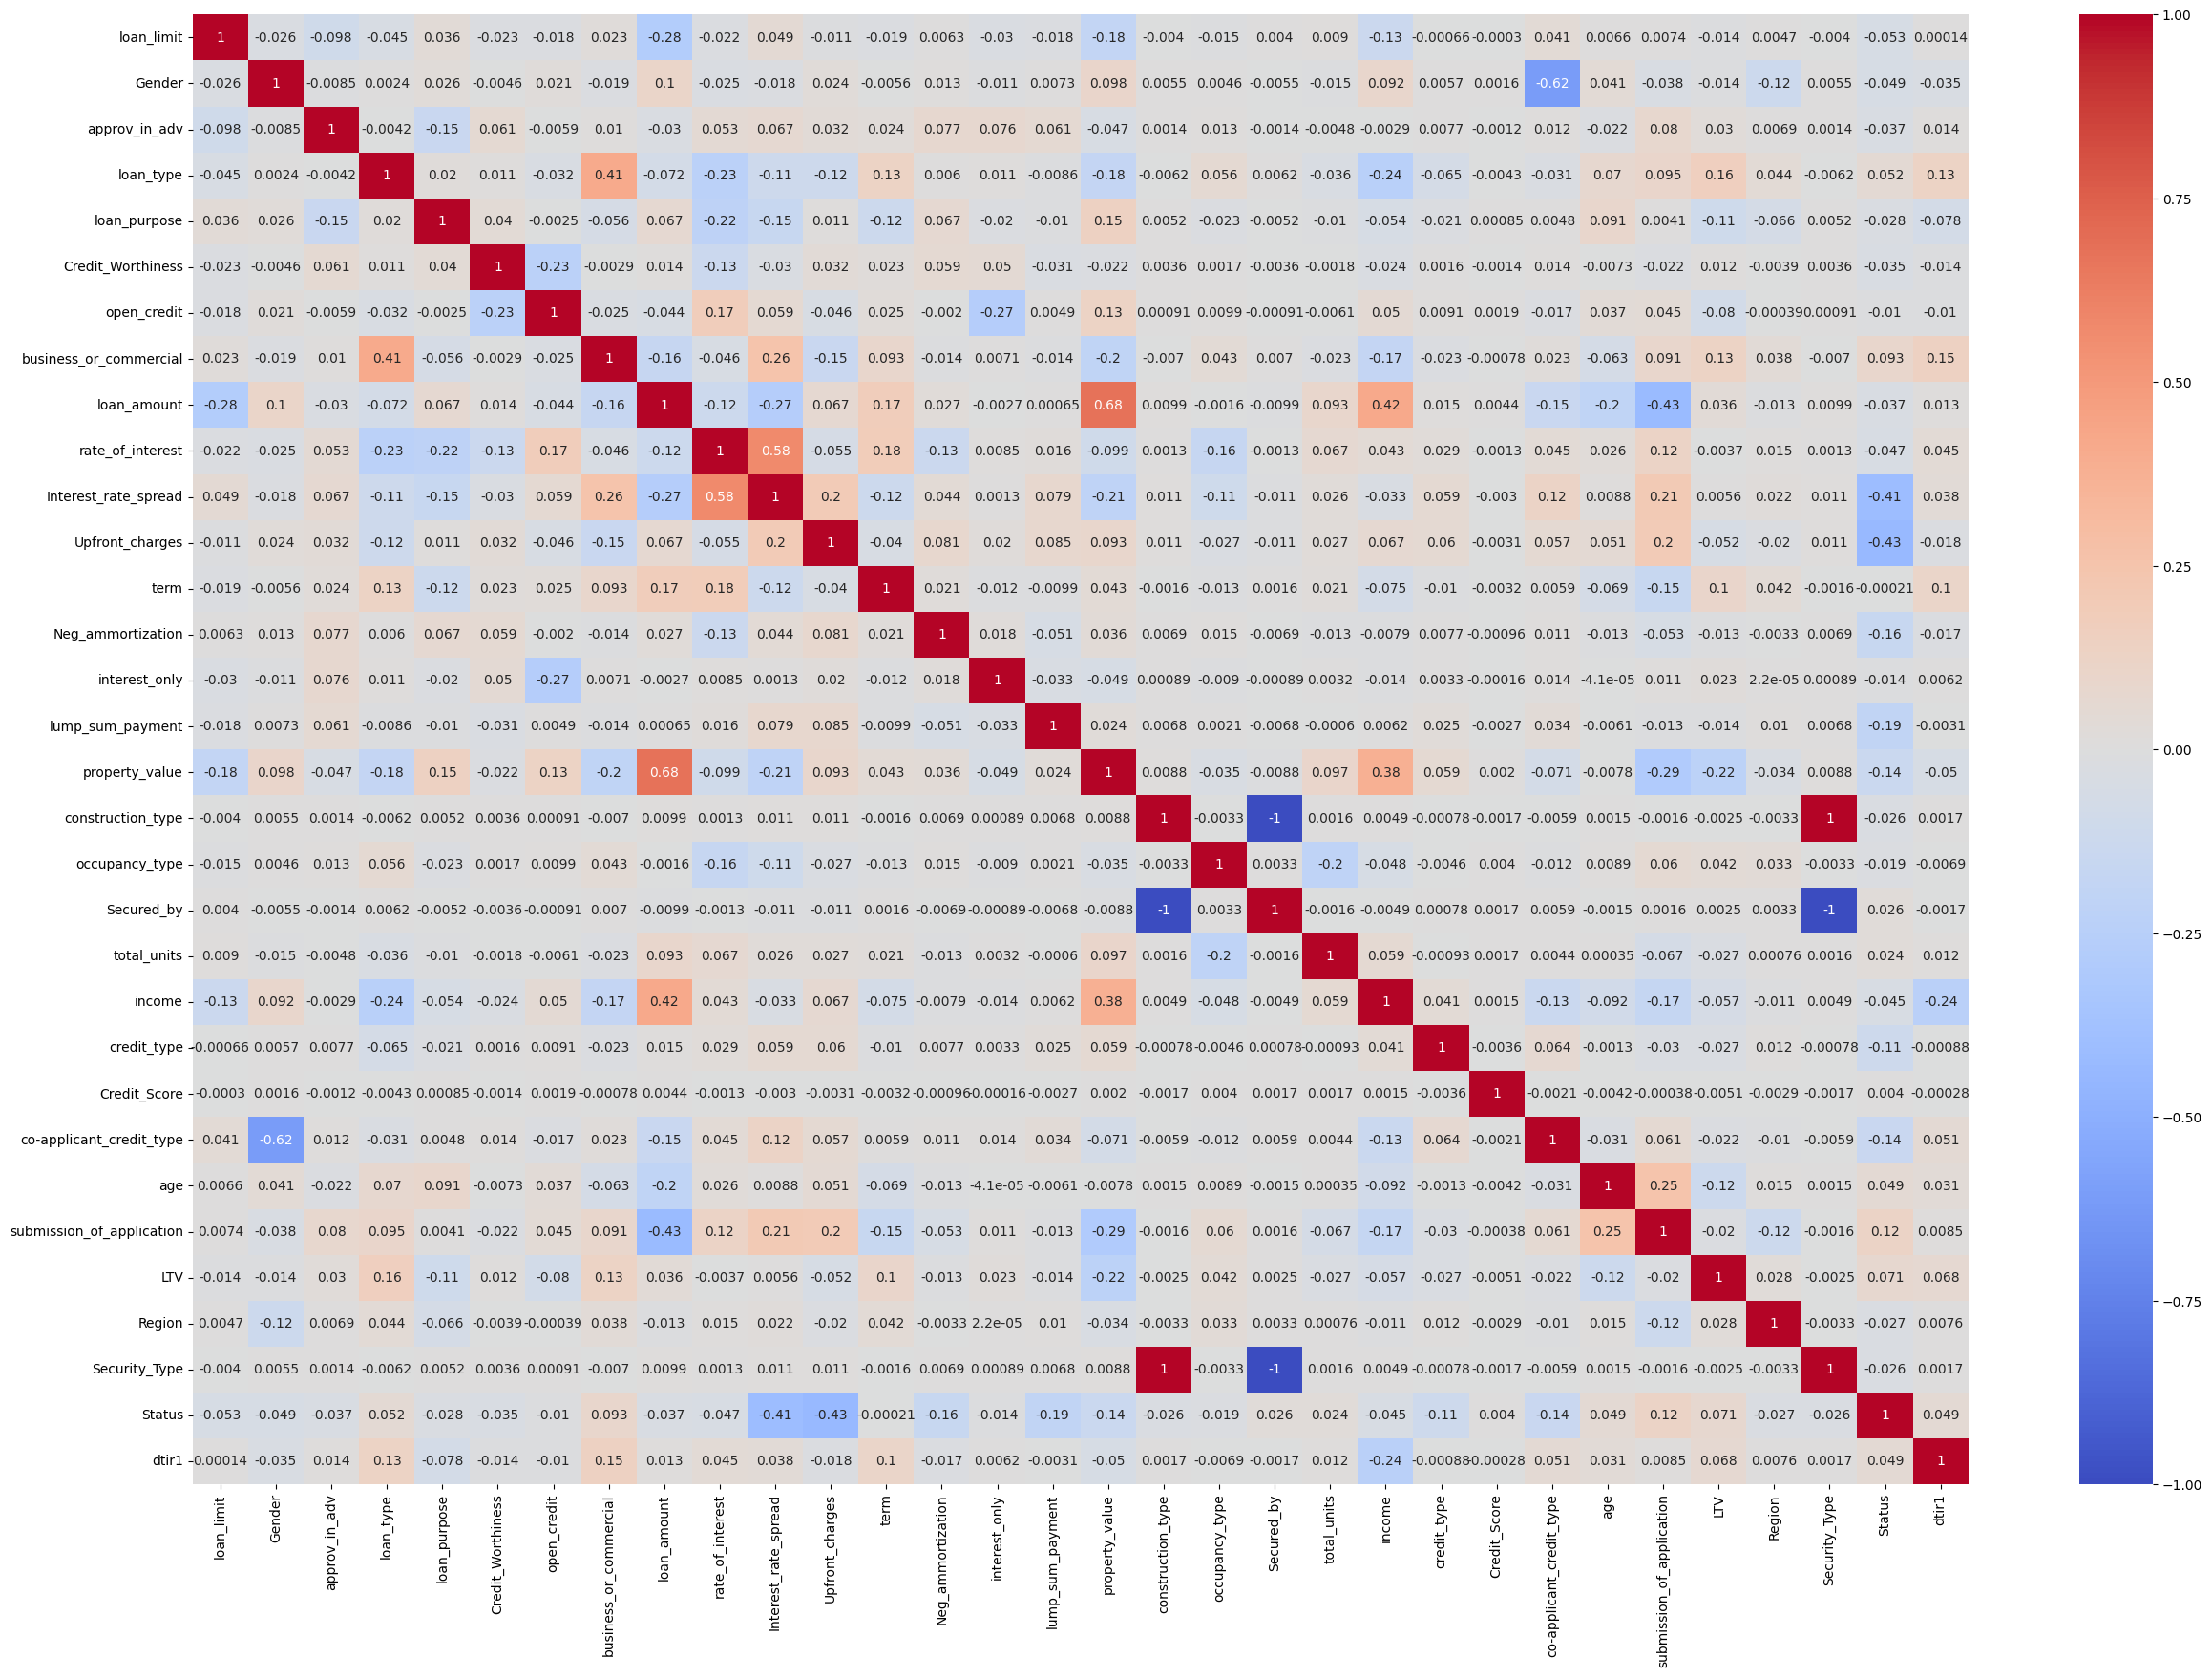

In [55]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [56]:
threshold = 0.003
correlation_matrix = df.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix["Status"]) > threshold].tolist()
high_corr_features.remove("Status")
print(high_corr_features)
X_selected = df[high_corr_features]
Y = df["Status"]

['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'dtir1']


In [57]:
X_selected

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,1,3,0,1,1,1,0,0,116500,3.990,...,1740.0,1,758,1,0,1,98.728814,1,1,45.0
1,1,1,0,2,1,1,0,1,206500,3.990,...,4980.0,2,552,0,3,1,81.250000,2,1,37.0
2,1,1,1,1,1,1,0,0,406500,4.560,...,9480.0,1,834,1,1,1,80.019685,1,1,46.0
3,1,1,0,1,4,1,0,0,456500,4.250,...,11880.0,1,587,1,2,0,69.376900,2,1,42.0
4,1,4,1,1,1,1,0,0,696500,4.000,...,10440.0,3,602,0,0,0,91.886544,2,1,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,1,3,0,1,3,1,0,0,436500,3.125,...,7860.0,4,659,0,3,1,71.792763,1,1,48.0
148666,1,1,0,1,1,1,0,0,586500,5.190,...,7140.0,4,569,1,0,0,74.428934,1,1,15.0
148667,1,1,0,1,4,1,0,0,446500,3.125,...,6900.0,4,702,0,2,0,61.332418,2,1,49.0
148668,1,2,0,1,4,1,0,0,196500,3.500,...,7140.0,1,737,0,3,1,70.683453,2,1,29.0


In [58]:
Y

,Status
0,1
1,1
2,0
3,0
4,0
...,...
148665,0
148666,0
148667,0
148668,0


In [59]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [61]:
x_train

array([[ 0.26822302,  0.40460262, -0.42935747, ..., -1.06039269,
         0.01490025, -2.65268926],
       [ 0.26822302, -1.30041792, -0.42935747, ..., -1.06039269,
         0.01490025,  0.5577937 ],
       [ 0.26822302, -0.44790765,  2.32906159, ...,  0.62837959,
         0.01490025,  0.45422973],
       ...,
       [ 0.26822302,  0.40460262, -0.42935747, ..., -1.06039269,
         0.01490025,  1.07561353],
       [ 0.26822302,  1.2571129 , -0.42935747, ...,  0.62837959,
         0.01490025, -1.20279373],
       [ 0.26822302,  0.40460262, -0.42935747, ..., -1.06039269,
         0.01490025, -1.72061356]])

In [62]:
x_test

array([[ 0.26822302, -0.44790765, -0.42935747, ...,  0.62837959,
         0.01490025,  0.35066576],
       [ 0.26822302,  0.40460262,  2.32906159, ..., -1.06039269,
         0.01490025,  0.66135766],
       [ 0.26822302,  0.40460262, -0.42935747, ..., -1.06039269,
         0.01490025,  0.35066576],
       ...,
       [ 0.26822302, -1.30041792, -0.42935747, ...,  0.62837959,
         0.01490025, -0.16715407],
       [ 0.26822302,  1.2571129 , -0.42935747, ...,  0.62837959,
         0.01490025, -1.82417753],
       [ 0.26822302,  1.2571129 , -0.42935747, ...,  0.62837959,
         0.01490025, -0.0635901 ]])

In [63]:
y_train

,Status
141245,0
3507,0
53688,0
46491,1
54671,0
...,...
119879,1
103694,0
131932,0
146867,0


In [64]:
y_test

,Status
24912,0
147068,0
123284,0
53610,0
39672,0
...,...
75378,0
19152,0
17876,1
26565,0


In [65]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [66]:
scaler = StandardScaler()
XSTR = scaler.fit_transform(x_train)
XSTE = scaler.transform(x_test)

In [67]:
LR = LogisticRegression()
LR.fit(XSTR,y_train)

LogisticRegression()

In [68]:
LR.score(XSTR,y_train)

0.9466519808972893

In [69]:
LR.score(XSTR,y_train)

0.9466519808972893

In [70]:
y_pred= LR.predict(XSTE)

In [71]:
accuracy_score(y_test , y_pred)

0.9463913365171185

In [72]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     22494
           1       0.88      0.91      0.89      7240

    accuracy                           0.95     29734
   macro avg       0.92      0.93      0.93     29734
weighted avg       0.95      0.95      0.95     29734



In [73]:
!pip install xgboost==1.6.0

In [74]:
import xgboost as xgb

In [112]:

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# ... (Your existing code) ...

# Assuming x_train, x_test, y_train, y_test are already defined

xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss') # Fixed
xgb_classifier.fit(x_train, y_train)

y_pred_xgb = xgb_classifier.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22494
           1       1.00      1.00      1.00      7240

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



In [84]:
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(XSTE)

# Evaluate the model's accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')

# Print the classification report
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22494
           1       1.00      1.00      1.00      7240

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



In [85]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

In [86]:
knn.fit(XSTR, y_train)

KNeighborsClassifier()

In [79]:
y_pred_knn = knn.predict(XSTE)

In [80]:
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 94.66%


In [81]:
classification_report(y_test, y_pred_knn)

'              precision    recall  f1-score   support\n\n           0       0.97      0.96      0.96     22494\n           1       0.89      0.89      0.89      7240\n\n    accuracy                           0.95     29734\n   macro avg       0.93      0.93      0.93     29734\nweighted avg       0.95      0.95      0.95     29734\n'

In [82]:
y_true = y_test
cm4 = confusion_matrix(y_true,y_pred_knn)
print(cm4)

[[21686   808]
 [  781  6459]]


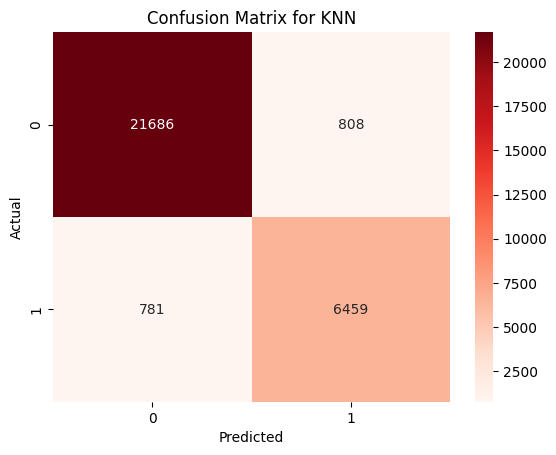

In [87]:
sns.heatmap(cm4, annot= True, fmt = 'd', cmap='Reds')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [88]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [89]:
rf.fit(XSTR, y_train)

RandomForestClassifier(random_state=42)

In [90]:
y_pred_rf = rf.predict(XSTE)

In [91]:
accuracyran = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracyran * 100:.2f}%')

Accuracy: 100.00%


In [92]:
y_true = y_test
cm5 = confusion_matrix(y_true,y_pred_rf)
print(cm5)

[[22493     1]
 [    0  7240]]


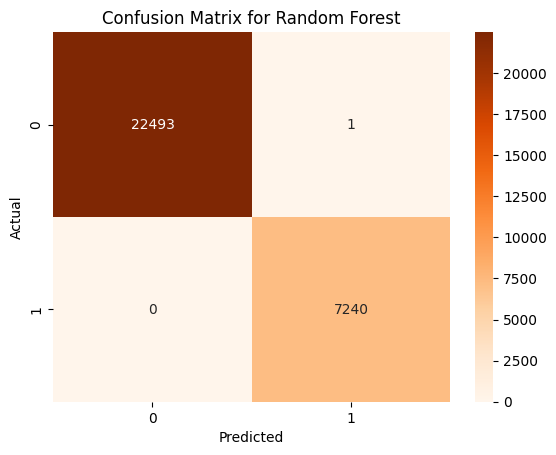

In [93]:
sns.heatmap(cm5, annot= True, fmt = 'd', cmap='Oranges')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [94]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [95]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [96]:
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,713 (202.00 KB)

 Trainable params: 51,713 (202.00 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2974/2974 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9530 - loss: 0.1176 - val_accuracy: 0.9914 - val_loss: 0.0329
Epoch 2/50
2974/2974 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9926 - loss: 0.0244 - val_accuracy: 0.9942 - val_loss: 0.0198
Epoch 3/50
2974/2974 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9946 - loss: 0.0188 - val_accuracy: 0.9962 - val_loss: 0.0140
Epoch 4/50
2974/2974 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9961 - loss: 0.0120 - val_accuracy: 0.9968 - val_loss: 0.0126
Epoch 5/50
2974/2974 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9968 - loss: 0.0112 - val_accuracy: 0.9960 - val_loss: 0.0141
Epoch 6/50
2974/2974 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9971 - loss: 0.0116 - val_accuracy: 0.9964 - val_loss: 0.0162
Epoch 7/50
2974/2974 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9975 - loss: 0.0118 - val_accuracy: 0.9970 - val_loss: 0.0129
Epoch 8/50
2974/2974 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9973 - loss: 0

In [98]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

930/930 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9975 - loss: 0.0697
Test Loss: 0.05058744177222252
Test Accuracy: 99.77%


In [99]:
predictions = model.predict(X_test)
predicted_classes = np.where(predictions > 0.5, 1, 0)
print("Predicted Classes:", predicted_classes.flatten())
print("True Classes:", y_test)

930/930 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Predicted Classes: [0 0 0 ... 1 0 1]
True Classes: 24912     0
147068    0
123284    0
53610     0
39672     0
         ..
75378     0
19152     0
17876     1
26565     0
91230     1
Name: Status, Length: 29734, dtype: int64


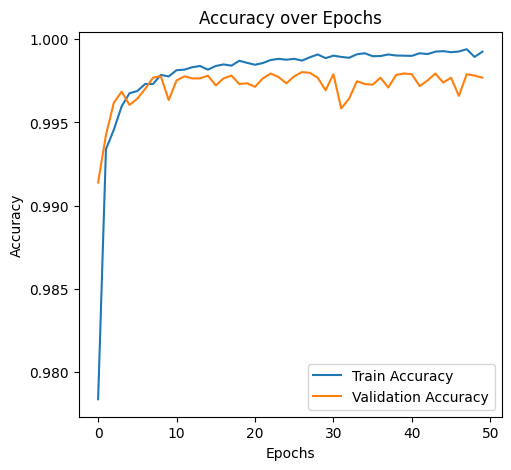

In [100]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

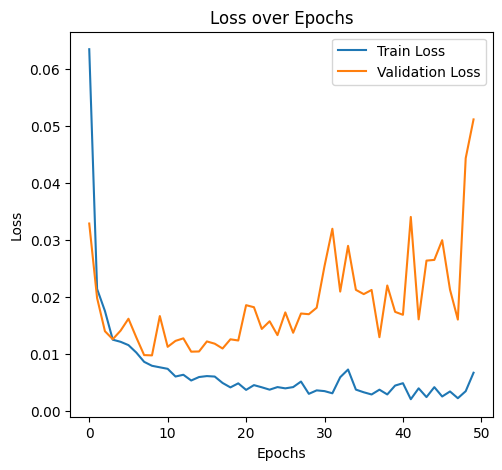

In [101]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [108]:
import pickle

In [109]:
with open('my_dataframe.pkl', 'wb') as file:
       pickle.dump(df, file)

In [110]:
with open('my_dataframe.pkl', 'rb') as file:
       loaded_df = pickle.load(file)

In [103]:
!pip install joblib==1.2.0

In [104]:
import joblib

In [105]:
# Save the model with high compression
joblib.dump(LR, 'compressed_model.joblib.gz', compress=('gzip', 9))

# Save the model with no compression
joblib.dump(LR, 'uncompressed_model.joblib')

['uncompressed_model.joblib']

In [106]:
# Load the compressed model
compressed_model = joblib.load('compressed_model.joblib.gz')

# Load the uncompressed model
uncompressed_model = joblib.load('uncompressed_model.joblib')

In [107]:
# Make predictions using the compressed model
compressed_predictions = compressed_model.predict(XSTE)

# Make predictions using the uncompressed model
uncompressed_predictions = uncompressed_model.predict(XSTE)